<a href="https://colab.research.google.com/github/ljcunha/pos_infnet/blob/main/Leonardo_Jose_da_Cunha_Processamento_de_Linguagem_Natural_com_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de Disciplina de Processamento de Linguagem Natural com Python

Bem-vindo ao projeto de disciplina de **Processamento de Linguagem Natural com Python**. Ao longo das últimas aulas vimos uma série de aplicações que nos deram a amplitude de possibilidades em trabalhar com textos. Para tal, usamos diversas bibliotecas, onde as que mais se destacaram foram NLTK, SPACY e GENSIM.

Esse notebook servirá de guia para a execução de uma análise de tópicos completa, usando o algoritmo de LDA e recursos para interpretação dos resultados. Utilizaremos notícias da seção "Mercado" extraídas da Folha de S. Paulo no ano de 2016.  Complete a análise com os códigos que achar pertinente e responda as questões presentes no Moodle. Boa sorte!

## O Notebook

Nesse notebook, você será guiado pela análise de **Extração de Tópicos**. As seguintes tarefas serão realizadas


1.   Download dos dados provenientes do kaggle
2.   Seleção dos dados relevantes para a nossa análise
3.   Instalação das principais ferramentas e importação de módulos
4.   Pré-processamento usando NLTK
5.   Pré-processamento usando Spacy
6.   Análise de tópicos usando LDA
7.   Análise de NER usando Spacy
8.   Visualização dos tópicos usando tokens e entidades.



## Instruções para baixar os dados

Para baixar os dados será necessário o uso do gerenciador de downloads da Kaggle. A Kaggle, uma subsidiária do grupo Alphabet (Google), é uma comunidade on-line de cientistas de dados e profissionais de aprendizado de máquina.

Para utilizar o gerenciador, será necessário criar uma conta no site Kaggle.com.
Com a conta criada, obtenha um token de acesso, no formato kaggle.json

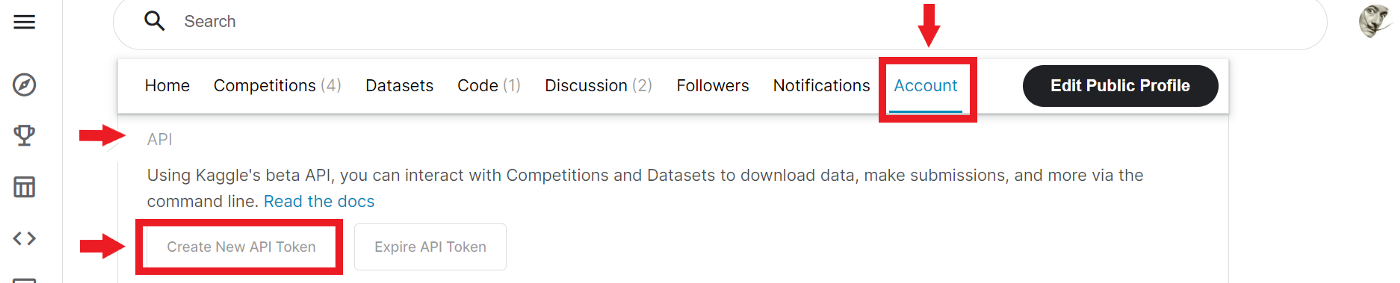

Em posse do token (baixe para seu computador), execute a células da próxima seção para acessar os dados de interesse e baixá-los.

# Baixe os dados

Instale o gerenciador kaggle no ambiente do Colab e faça o upload do arquivo kaggle.json

In [1]:
# Célula 1

!pip install -q kaggle
!rm -rf kaggle.json
from google.colab import files

files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ljcunha","key":"157a134f79ff9b7dea7a423cb285d709"}'}

Crie a pasta .kaggle

In [2]:
# Célula 2

!rm -rf .kaggle
!mkdir .kaggle
!cp kaggle.json .kaggle/
!chmod 600 .kaggle/kaggle.json

Baixe o dataset

In [3]:
# Célula 3

################################ Código Leonardo Cunha - LC #################################################
import os
import shutil
from google.colab import files

# Forçar o upload novamente
uploaded = files.upload()

# Localizar o arquivo correto (mesmo que renomeado pelo Colab)
for filename in uploaded.keys():
    if 'kaggle' in filename and filename.endswith('.json'):
        correct_name = 'kaggle.json'
        shutil.move(filename, correct_name)
        break

# Criar o diretório e mover o arquivo para o local correto
kaggle_dir = os.path.expanduser("~/.kaggle")
os.makedirs(kaggle_dir, exist_ok=True)
shutil.move(correct_name, os.path.join(kaggle_dir, correct_name))

# Ajustar permissões
os.chmod(os.path.join(kaggle_dir, correct_name), 0o600)
print("✅ kaggle.json configurado com sucesso!")

Saving kaggle.json to kaggle (1).json
✅ kaggle.json configurado com sucesso!


In [4]:
# Célula 4

!kaggle datasets download --force -d marlesson/news-of-the-site-folhauol

Dataset URL: https://www.kaggle.com/datasets/marlesson/news-of-the-site-folhauol
License(s): CC0-1.0
 62% 116M/187M [00:00<00:00, 1.20GB/s]
100% 187M/187M [00:00<00:00, 748MB/s] 


## Criar o DataFrame com os dados lidos diretamente da plataforma Kaggle

In [6]:
# Célula 5

import pandas as pd
from tqdm.auto import tqdm
tqdm.pandas()


df = pd.read_csv("news-of-the-site-folhauol.zip")

# Atualizar o SPACY e  instalar os modelos pt_core_news_lg

In [7]:
# Célula 6

################################## LEONARDO CUNHA ###########################################
# Escreva seu código aqui
# ...

# Atualizar spaCy
!pip install -U spacy

# Instalar o modelo de português grande
!python -m spacy download pt_core_news_lg

#############################################################################################
import spacy
from spacy.lang.pt.stop_words import STOP_WORDS

################################## LEONARDO CUNHA ###########################################

try:
    nlp = spacy.load('pt_core_news_lg')
    print("pt_core_news_lg carregado com sucesso!")
except OSError:
    print("pt_core_news_lg não foi encontrado. Verifique a instalação.")

#############################################################################################


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.0/33.0 MB 22.8 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.8.5
    Uninstalling spacy-3.8.5:
      Successfully uninstalled spacy-3.8.5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.2/568.2 MB 1.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
pt_core_news_lg carregado com sucesso!


## Instalar os datasets `stopwords`, `punkt` e `rslp` do nltk

In [8]:
# Célula 7

################################## LEONARDO CUNHA ###########################################
!pip install nltk
#############################################################################################

In [9]:
# Célula 8

import nltk

################################## LEONARDO CUNHA ###########################################
# Escreva seu código aqui
#from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('rslp')

#############################################################################################

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

## Carregar os módulos usados ao longo desse notebook

In [10]:
# Célula 9

!pip install pyldavis &> /dev/null

import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
import numpy as np

from wordcloud import WordCloud

import seaborn as sns
import matplotlib.pyplot as plt
from itertools import chain

from typing import List, Set, Any


SEED = 123

# Filtrando os dados para utilizar apenas as notícias do ano de 2016 e da categoria "Mercado"

Filtre os dados do DataFrame df e crie um DataFrame news_2016 que contenha apenas notícias de **2016** e da categoria **mercado**.

In [11]:
# Célula 10

df['date'] = pd.to_datetime(df.date)

#################################### LEONARDO CUNHA ###########################################
# Create a dataframe named news_2016
# news_2016 =
news_2016 = df[(df['date'].dt.year == 2016) & (df['category'].str.lower() == 'mercado')] # Filtrando apenas as linhas de 2016 e categoria 'mercado' - Leonardo Cunha

###############################################################################################

In [12]:
# Célula 11

#################################### LEONARDO CUNHA ###########################################
# Verificando o resultado - LC
news_2016.head()
###############################################################################################

,title,text,date,category,subcategory,link
34207,Fazendeira cria própria rede de banda larga e ...,"""Sou apenas a mulher de um fazendeiro"", diz Ch...",2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...
34238,Alteração na cobrança do ICMS eleva conta de c...,A conta do celular pós-pago ou controle ficará...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...
34245,Ajustes sobre servidores públicos emperram nos...,A maior parte dos projetos de ajuste das conta...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...
34248,Inventor da internet das coisas ataca mitos so...,Desde as primeiras décadas do século 19 se diz...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...
34249,Livro analisa empresas de crescimento exponenc...,O Cifras & Letras seleciona semanalmente lança...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...


In [13]:
# Célula 12

#################################### LEONARDO CUNHA ###########################################
# Verificando o tamanho do df - Tem que ter 7943 linhas
news_2016.shape[0]
###############################################################################################

7943

## NLTK Tokenizer and Stemmer

Crie uma coluna no dataframe `news_2016` contendo os tokens para cada um dos textos. Os tokens devem estar representados pelo radical das palavras (stem).
Para tal, complete o conteúdo da função `tokenize`.

In [14]:
# Célula 13


def tokenize(text: str) -> List:
  """
  Function for tokenizing using `nltk.tokenize.word_tokenize`

  Returns:
    - A list of stemmed tokens (`nltk.stem.RSLPStemmer`)
    IMPORTANT: Only tokens with alphabetic
               characters will be returned.
  """
  ################################## LEONARDO CUNHA ########################################
  #escreva seu código aqui
  #return
  from nltk.tokenize import word_tokenize
  from nltk.corpus import stopwords
  from nltk.stem import RSLPStemmer
  stop_words = set(stopwords.words('portuguese'))

  stemmer = RSLPStemmer()
  tokens = word_tokenize(text, language='portuguese')

  # Remove stopwords e aplica stemming apenas em tokens alfabéticos
  stemmed_tokens = [
        stemmer.stem(token.lower())
        for token in tokens
        if token.isalpha() and token.lower() not in stop_words
    ]
  return stemmed_tokens


  ##########################################################################################

news_2016.loc[:, 'nltk_tokens'] = news_2016.text.progress_map(tokenize)

  0%|          | 0/7943 [00:00<?, ?it/s]

In [15]:
# Célula 14

################################## LEONARDO CUNHA ########################################
# Testando a saída para ver se uma coluna foi criada com os tokens NLTK com os radicais
# e sem as stopwords

news_2016.head()

##########################################################################################

,title,text,date,category,subcategory,link,nltk_tokens
34207,Fazendeira cria própria rede de banda larga e ...,"""Sou apenas a mulher de um fazendeiro"", diz Ch...",2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[apen, mulh, fazend, diz, christin, cond, modé..."
34238,Alteração na cobrança do ICMS eleva conta de c...,A conta do celular pós-pago ou controle ficará...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[cont, celul, control, fic, car, part, decis, ..."
34245,Ajustes sobre servidores públicos emperram nos...,A maior parte dos projetos de ajuste das conta...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[mai, part, projet, ajust, cont, públic, aprov..."
34248,Inventor da internet das coisas ataca mitos so...,Desde as primeiras décadas do século 19 se diz...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[desd, prim, déc, sécul, diz, not, óper, sinfo..."
34249,Livro analisa empresas de crescimento exponenc...,O Cifras & Letras seleciona semanalmente lança...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[cifr, letr, selec, seman, lanç, áre, negóci, ..."


## Criar uma documento SPACY para cada texto do dataset

Crie uma coluna `spacy_doc` que contenha os objetos spacy para cada texto do dataset de interesse. Para tal, carregue os modelos `pt_core_news_lg` e aplique em todos os textos (pode demorar alguns minutos...)

In [16]:
# Célula 15

################################## LEONARDO CUNHA ###########################################
# Escreva seu código aqui
# ...
# Já tinha feito em cima, mas fazendo novamente só para ficar no local que está
# sendo pedido.

# Carregando o modelo do Spacy pt_core_news_lg
try:
    nlp = spacy.load('pt_core_news_lg')
    print("pt_core_news_lg carregado com sucesso!")
except OSError:
    print("pt_core_news_lg não foi encontrado. Verifique a instalação.")


# news_2016.loc[:, 'spacy_doc'] = ...(complete)
news_2016.loc[:, 'spacy_doc'] = news_2016['text'].progress_map(nlp)

#############################################################################################


pt_core_news_lg carregado com sucesso!


  0%|          | 0/7943 [00:00<?, ?it/s]

In [17]:
# Célula 16

################################## LEONARDO CUNHA ########################################
# Testando a saída para ver se uma coluna foi criada com os NLP funcionou

news_2016.head()

##########################################################################################

,title,text,date,category,subcategory,link,nltk_tokens,spacy_doc
34207,Fazendeira cria própria rede de banda larga e ...,"""Sou apenas a mulher de um fazendeiro"", diz Ch...",2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[apen, mulh, fazend, diz, christin, cond, modé...","("", Sou, apenas, a, mulher, de, um, fazendeiro..."
34238,Alteração na cobrança do ICMS eleva conta de c...,A conta do celular pós-pago ou controle ficará...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[cont, celul, control, fic, car, part, decis, ...","(A, conta, do, celular, pós-pago, ou, controle..."
34245,Ajustes sobre servidores públicos emperram nos...,A maior parte dos projetos de ajuste das conta...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[mai, part, projet, ajust, cont, públic, aprov...","(A, maior, parte, dos, projetos, de, ajuste, d..."
34248,Inventor da internet das coisas ataca mitos so...,Desde as primeiras décadas do século 19 se diz...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[desd, prim, déc, sécul, diz, not, óper, sinfo...","(Desde, as, primeiras, décadas, do, século, 19..."
34249,Livro analisa empresas de crescimento exponenc...,O Cifras & Letras seleciona semanalmente lança...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[cifr, letr, selec, seman, lanç, áre, negóci, ...","(O, Cifras, &, Letras, seleciona, semanalmente..."


## Realize a Lematização usando SPACY

O modelo NLP do spacy oferece a possiblidade de lematizar textos em português (o que não acontece com a biblioteca NLTK). Iremos criar uma lista de tokens
lematizados para cada texto do nosso dataset. Para tal, iremos retirar as
stopwords, usando uma função que junta stopwords provenientes do NLTK e do Spacy. Essa lista completa, é retornada pela função stopwords (e você não precisa mexer).

Já a função filter retorna True caso o token seja composto por caracters alfabéticos, não estiver dentro da lista de stopwords e o lemma resultante não estiver contido na lista `o", "em", "em o", "em a" e "ano"`.

Crie uma coluna chamada `spacy_lemma` para armazenar o resultado desse pré-processamento.

In [18]:
# Célula 17

def stopwords() -> Set:
    """
    Return complete list of stopwords
    """
    return set(list(nltk.corpus.stopwords.words("portuguese")) + list(STOP_WORDS))

complete_stopwords = stopwords()

def filter(w: spacy.lang.pt.Portuguese) -> bool:
    """
    Filter stopwords and undesired tokens
    """
    ############################### LEONARDO CUNHA ###############################
    # Escreva seu código aqui
    # Lemas que devem ser removidos mesmo após lematização
    undesired_lemmas = {"o", "em", "em o", "em a", "ano", "de o","de", "este", "por", "a", "e", "para", "outro", "esse", "essa", "por o", "em este", "de este"}

    return (
        w.is_alpha and  # Apenas tokens com caracteres alfabéticos
        w.lemma_.lower() not in complete_stopwords and  # Não ser stopword
        w.lemma_.lower() not in undesired_lemmas  # Não estar nos lemas indesejados
    )

    ##############################################################################


def lemma(doc: spacy.lang.pt.Portuguese) -> List[str]:
    """
    Apply spacy lemmatization on the tokens of a text

    Returns:
       - a list representing the standardized (with lemmatisation) vocabulary
    """
    ############################### LEONARDO CUNHA ###############################
    # Escreva seu cógigo aqui
    return [w.lemma_.lower() for w in doc if filter(w)]

    ##############################################################################

news_2016.loc[:, 'spacy_lemma'] = news_2016.spacy_doc.progress_map(lemma)

  0%|          | 0/7943 [00:00<?, ?it/s]

In [19]:
# Célula 18

################################## LEONARDO CUNHA ########################################
# Testando a saída para ver se uma coluna foi criada com os Lemma funcionou

news_2016.head()

##########################################################################################

,title,text,date,category,subcategory,link,nltk_tokens,spacy_doc,spacy_lemma
34207,Fazendeira cria própria rede de banda larga e ...,"""Sou apenas a mulher de um fazendeiro"", diz Ch...",2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[apen, mulh, fazend, diz, christin, cond, modé...","("", Sou, apenas, a, mulher, de, um, fazendeiro...","[mulher, fazendeiro, christine, conder, modést..."
34238,Alteração na cobrança do ICMS eleva conta de c...,A conta do celular pós-pago ou controle ficará...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[cont, celul, control, fic, car, part, decis, ...","(A, conta, do, celular, pós-pago, ou, controle...","[conta, celular, controle, ficar, cara, decisã..."
34245,Ajustes sobre servidores públicos emperram nos...,A maior parte dos projetos de ajuste das conta...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[mai, part, projet, ajust, cont, públic, aprov...","(A, maior, parte, dos, projetos, de, ajuste, d...","[projeto, ajuste, conta, público, aprovar, mau..."
34248,Inventor da internet das coisas ataca mitos so...,Desde as primeiras décadas do século 19 se diz...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[desd, prim, déc, sécul, diz, not, óper, sinfo...","(Desde, as, primeiras, décadas, do, século, 19...","[década, século, nota, ópera, sinfonia, brotar..."
34249,Livro analisa empresas de crescimento exponenc...,O Cifras & Letras seleciona semanalmente lança...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[cifr, letr, selec, seman, lanç, áre, negóci, ...","(O, Cifras, &, Letras, seleciona, semanalmente...","[cifras, letras, selecionar, semanalmente, lan..."


## Reconhecimento de entidades nomeadas

Crie uma coluna `spacy_ner` que armazene todas as organizações (APENAS organizações) que estão contidas no texto.

In [20]:
# Célula 19

def NER(doc: spacy.lang.pt.Portuguese):
  """
  Return the list of organizations for a SPACY document
  """
  ############################### LEONARDO CUNHA ###############################
  # Escreva seu código aqui

  return [ent.text for ent in doc.ents if ent.label_ == "ORG"]

  ##############################################################################

news_2016.loc[:, 'spacy_ner'] = news_2016.spacy_doc.progress_map(NER)

  0%|          | 0/7943 [00:00<?, ?it/s]

In [21]:
# Célula 20

################################## LEONARDO CUNHA ########################################
# Testando a saída para ver se uma coluna foi criada com os Spacy_ner funcionou

news_2016.head()

##########################################################################################

,title,text,date,category,subcategory,link,nltk_tokens,spacy_doc,spacy_lemma,spacy_ner
34207,Fazendeira cria própria rede de banda larga e ...,"""Sou apenas a mulher de um fazendeiro"", diz Ch...",2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[apen, mulh, fazend, diz, christin, cond, modé...","("", Sou, apenas, a, mulher, de, um, fazendeiro...","[mulher, fazendeiro, christine, conder, modést...","[Gbps, Ofcom, Cavamos, Membro da, Ordem do Imp..."
34238,Alteração na cobrança do ICMS eleva conta de c...,A conta do celular pós-pago ou controle ficará...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[cont, celul, control, fic, car, part, decis, ...","(A, conta, do, celular, pós-pago, ou, controle...","[conta, celular, controle, ficar, cara, decisã...","[Oi, TIM, Claro, Vivo, Secretaria de Estado da..."
34245,Ajustes sobre servidores públicos emperram nos...,A maior parte dos projetos de ajuste das conta...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[mai, part, projet, ajust, cont, públic, aprov...","(A, maior, parte, dos, projetos, de, ajuste, d...","[projeto, ajuste, conta, público, aprovar, mau...","[Executivo dos três Estados, Executivo, Assemb..."
34248,Inventor da internet das coisas ataca mitos so...,Desde as primeiras décadas do século 19 se diz...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[desd, prim, déc, sécul, diz, not, óper, sinfo...","(Desde, as, primeiras, décadas, do, século, 19...","[década, século, nota, ópera, sinfonia, brotar...","[MIT, Instituto de Tecnologia de Massachusetts..."
34249,Livro analisa empresas de crescimento exponenc...,O Cifras & Letras seleciona semanalmente lança...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[cifr, letr, selec, seman, lanç, áre, negóci, ...","(O, Cifras, &, Letras, seleciona, semanalmente...","[cifras, letras, selecionar, semanalmente, lan...","[Singularity University, Sistema Financeiro Na..."


## Bag-of-Words

Crie uma coluna `tfidf` no dataframe `news_2016`. Use a coluna `spacy_lemma` como base para cálculo do TFIDF.
O número máximo de features que iremos considerar é 5000. E o token, tem que ter aparecido pelo menos 10 vezes (`min_df`) nos documentos.

In [22]:
# Célula 21

class Vectorizer:
  def __init__(self, doc_tokens: List):
    self.doc_tokens = doc_tokens
    self.tfidf = None


  def vectorizer(self):
      """
      Convert a list of tokens to tfidf vector
      Returns the tfidf vector and attribute it to self.tfidf
      """
      ######################## LEONARDO CUNHA #########################
      # Escreva seu código aqui
      #...
      corpus = [' '.join(tokens) for tokens in self.doc_tokens]
      vectorizer = TfidfVectorizer(max_features=5000, min_df=10)
      self.tfidf = vectorizer.fit(corpus)

      # return ...
      return self.tfidf

      # Cria o vetorizador TF-IDF apenas com as configurações
      #self.tfidf = TfidfVectorizer(max_features=5000, min_df=10)

      # Não ajusta o modelo aqui, pois será ajustado documento a documento durante a chamada
      #return self.tfidf


      #################################################################

  def __call__(self):
    if self.tfidf is None:
        self.vectorizer()
    return self.tfidf

doc_tokens = news_2016.spacy_lemma.values.tolist()
vectorizer = Vectorizer(doc_tokens)

def tokens2tfidf(tokens):
    tokens = ' '.join(tokens)
    array =  vectorizer().transform([tokens]).toarray()[0]
    return array


news_2016.loc[:, 'tfidf'] = news_2016.spacy_lemma.progress_map(tokens2tfidf)

  0%|          | 0/7943 [00:00<?, ?it/s]

In [23]:
# Célula 22

################################## LEONARDO CUNHA ########################################
# Testando a saída para ver se uma coluna foi criada com os tf-idf funcionou

news_2016.head()

##########################################################################################

,title,text,date,category,subcategory,link,nltk_tokens,spacy_doc,spacy_lemma,spacy_ner,tfidf
34207,Fazendeira cria própria rede de banda larga e ...,"""Sou apenas a mulher de um fazendeiro"", diz Ch...",2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[apen, mulh, fazend, diz, christin, cond, modé...","("", Sou, apenas, a, mulher, de, um, fazendeiro...","[mulher, fazendeiro, christine, conder, modést...","[Gbps, Ofcom, Cavamos, Membro da, Ordem do Imp...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
34238,Alteração na cobrança do ICMS eleva conta de c...,A conta do celular pós-pago ou controle ficará...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[cont, celul, control, fic, car, part, decis, ...","(A, conta, do, celular, pós-pago, ou, controle...","[conta, celular, controle, ficar, cara, decisã...","[Oi, TIM, Claro, Vivo, Secretaria de Estado da...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
34245,Ajustes sobre servidores públicos emperram nos...,A maior parte dos projetos de ajuste das conta...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[mai, part, projet, ajust, cont, públic, aprov...","(A, maior, parte, dos, projetos, de, ajuste, d...","[projeto, ajuste, conta, público, aprovar, mau...","[Executivo dos três Estados, Executivo, Assemb...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
34248,Inventor da internet das coisas ataca mitos so...,Desde as primeiras décadas do século 19 se diz...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[desd, prim, déc, sécul, diz, not, óper, sinfo...","(Desde, as, primeiras, décadas, do, século, 19...","[década, século, nota, ópera, sinfonia, brotar...","[MIT, Instituto de Tecnologia de Massachusetts...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
34249,Livro analisa empresas de crescimento exponenc...,O Cifras & Letras seleciona semanalmente lança...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[cifr, letr, selec, seman, lanç, áre, negóci, ...","(O, Cifras, &, Letras, seleciona, semanalmente...","[cifras, letras, selecionar, semanalmente, lan...","[Singularity University, Sistema Financeiro Na...","[0.0, 0.0, 0.042800766704932484, 0.0, 0.0, 0.0..."


## Extração de Tópicos

Realize a extração de 9 tópicos usando a implementação do sklearn do algoritmo Latent Dirichlet Allocation. Como parâmetros, você irá usar o número máximo de iterações igual à 100 (pode demorar) e o `random_seed` igual a `SEED` que foi setado no início do notebook

In [24]:
# Célula 23

N_TOKENS = 9

corpus = np.array(news_2016.tfidf.tolist())

############################## LEONARDO CUNHA #################################
#Escreva seu código aqui
#lda = ... (complete)
#lda = LDA(n_components=N_TOKENS, random_state=SEED)
#lda.fit(corpus)
lda = LDA(n_components=N_TOKENS, random_state=SEED)

for tfidf_vector in news_2016['tfidf']:
    lda.partial_fit(np.array([tfidf_vector]))
###############################################################################

In [25]:
# Célula 24

############################ LEONARDO CUNHA ###################################

# Quero testar se estou indo pelo caminho certo ou que pelo menos faça algum sentido

def display_topics(model, feature_names, n_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        top_features = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        print(f"Tópico {topic_idx + 1}: {', '.join(top_features)}\n")

# Pegar os nomes das "palavras" que o TF-IDF usou
tfidf_feature_names = vectorizer().get_feature_names_out()

# Mostrar as top 10 palavras de cada um dos 9 tópicos
display_topics(lda, tfidf_feature_names, n_top_words=10)

##############################################################################

Tópico 1: mercado, crédito, venda, investimento, brasil, produto, companhia, mundo, negócio, indústria

Tópico 2: petrobras, btg, construção, pactual, imobiliário, sócio, comunicado, comunicar, estatal, líquido

Tópico 3: site, contribuinte, valer, esocial, custar, guia, alíquota, cálculo, operadora, declaração

Tópico 4: país, pagar, título, preço, taxa, receber, comprar, imóvel, precisar, acionista

Tópico 5: ministro, fmi, lagarde, perfuração, verdadeiro, christine, atenas, partida, reunião, sono

Tópico 6: usina, digital, editora, aneel, pág, autor, vídeo, ons, the, elétrica

Tópico 7: deficit, aeroporto, edição, viracopos, liminar, porto, campinas, stanley, portaria, suposto

Tópico 8: bilhão, empresa, governo, banco, inflação, milhão, economia, dever, energia, passado

Tópico 9: petróleo, índice, preço, queda, dólar, mercado, alta, ação, bolsa, taxa



### Atribua a cada text, um (e apenas um) tópic.

Crie uma coluna `topic` onde o valor é exatamente o tópico que melhor caracteriza o documento de acordo com o algoritmo de LDA.

In [26]:
# Célula 25

def get_topic(tfidf: np.array):
    """
    Get topic for a lda trained model
    """
    ############################ LEONARDO CUNHA ###############################
    # Escreva seu código aqui
    #topic_distribution = lda.transform([tfidf])
    #return int(np.argmax(topic_distribution))

    topic_distribution = lda.transform([tfidf])[0]
    return int(np.argmax(topic_distribution))


    ###########################################################################

news_2016['topic'] = news_2016.tfidf.progress_map(get_topic)

  0%|          | 0/7943 [00:00<?, ?it/s]

In [27]:
# Célula 26

topic_counts = news_2016['topic'].value_counts().sort_index()
print("Distribuição atual de tópicos:\n", topic_counts)


Distribuição atual de tópicos:
 topic
0    2148
1      37
2      22
3     112
5      36
7    4716
8     872
Name: count, dtype: int64


In [28]:
# Célula 27

################################## LEONARDO CUNHA ########################################
# Testando a saída da coluna topic

news_2016.head()

##########################################################################################

,title,text,date,category,subcategory,link,nltk_tokens,spacy_doc,spacy_lemma,spacy_ner,tfidf,topic
34207,Fazendeira cria própria rede de banda larga e ...,"""Sou apenas a mulher de um fazendeiro"", diz Ch...",2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[apen, mulh, fazend, diz, christin, cond, modé...","("", Sou, apenas, a, mulher, de, um, fazendeiro...","[mulher, fazendeiro, christine, conder, modést...","[Gbps, Ofcom, Cavamos, Membro da, Ordem do Imp...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3
34238,Alteração na cobrança do ICMS eleva conta de c...,A conta do celular pós-pago ou controle ficará...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[cont, celul, control, fic, car, part, decis, ...","(A, conta, do, celular, pós-pago, ou, controle...","[conta, celular, controle, ficar, cara, decisã...","[Oi, TIM, Claro, Vivo, Secretaria de Estado da...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",7
34245,Ajustes sobre servidores públicos emperram nos...,A maior parte dos projetos de ajuste das conta...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[mai, part, projet, ajust, cont, públic, aprov...","(A, maior, parte, dos, projetos, de, ajuste, d...","[projeto, ajuste, conta, público, aprovar, mau...","[Executivo dos três Estados, Executivo, Assemb...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",7
34248,Inventor da internet das coisas ataca mitos so...,Desde as primeiras décadas do século 19 se diz...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[desd, prim, déc, sécul, diz, not, óper, sinfo...","(Desde, as, primeiras, décadas, do, século, 19...","[década, século, nota, ópera, sinfonia, brotar...","[MIT, Instituto de Tecnologia de Massachusetts...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
34249,Livro analisa empresas de crescimento exponenc...,O Cifras & Letras seleciona semanalmente lança...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[cifr, letr, selec, seman, lanç, áre, negóci, ...","(O, Cifras, &, Letras, seleciona, semanalmente...","[cifras, letras, selecionar, semanalmente, lan...","[Singularity University, Sistema Financeiro Na...","[0.0, 0.0, 0.042800766704932484, 0.0, 0.0, 0.0...",5


## Número de documentos vs tópicos

Esse gráfico nos mostra quantos documentos foram caracterizados por cada tópico.

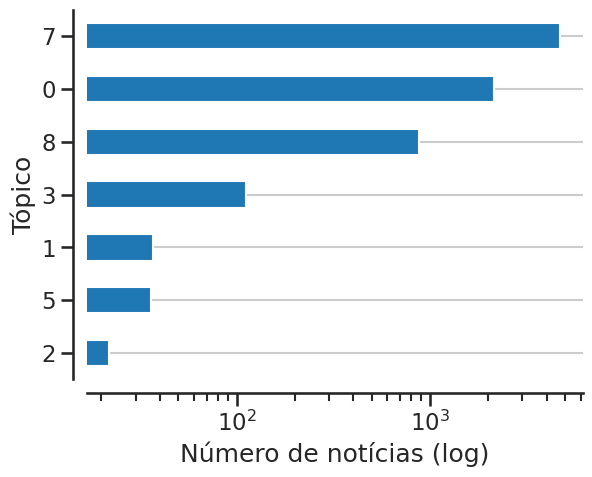

In [29]:
# Célula 28

with sns.axes_style("ticks"):
    sns.set_context("talk")
    ax = news_2016['topic'].value_counts().sort_values().plot(kind = 'barh')
    ax.yaxis.grid(True)
    ax.set_ylabel("Tópico")
    ax.set_xlabel("Número de notícias (log)")
    sns.despine(offset = 10)
    ax.set_xscale("log")

## Crie uma nuvem de palavra para cada tópico.

Use as colunas `spacy_lemma` e  `topic` para essa tarefa.

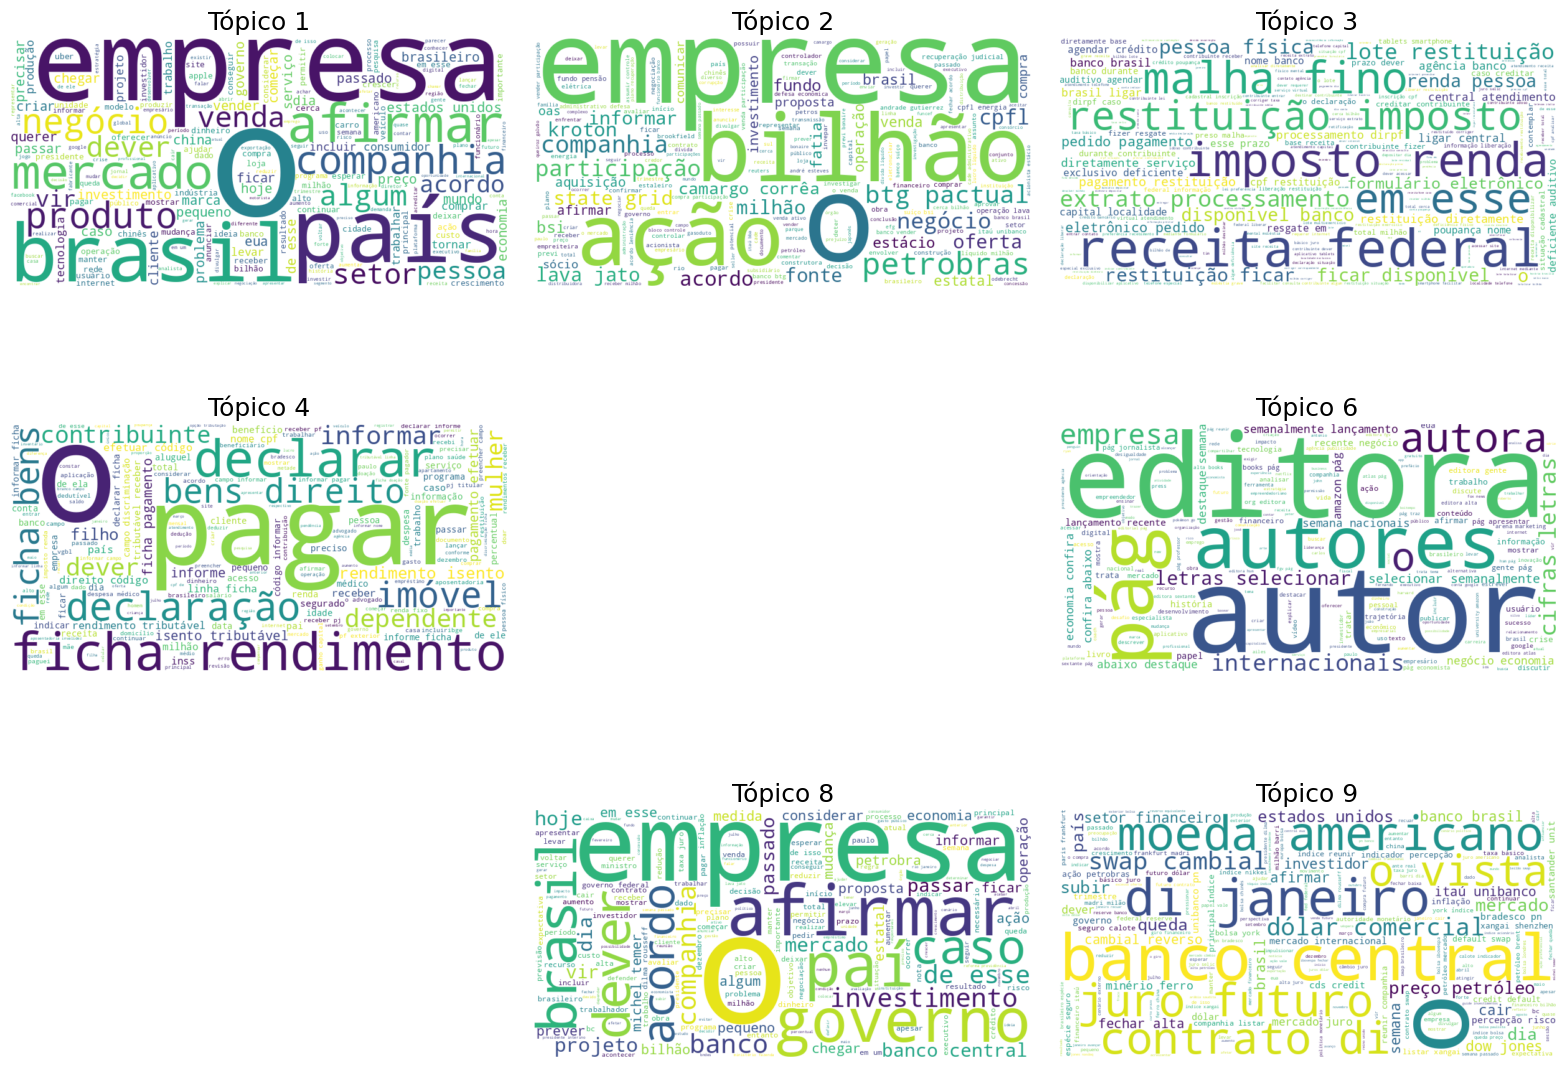

In [30]:
# Célula 29

def plot_wordcloud(text:str, ax:plt.Axes) -> plt.Axes:
    """
    Plot the wordcloud for the text/
    Arguments:
        -  text: string to be analised
        -  ax: plt subaxis
    Returns:
     - ax
    """
    ############################## LEONARDO CUNHA #############################
    # Escreva seu código aqui
    # return ax
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    return ax
    ###########################################################################

def plot_wordcloud_for_a_topic(topic:int, ax:plt.Axes) -> plt.Axes:
    topic_news = news_2016[news_2016['topic'] == topic]
    list_of_words = chain(*topic_news.spacy_lemma.values.tolist())
    string_complete = ' '.join(list_of_words)
    if not string_complete:
        return None
    return plot_wordcloud(string_complete, ax)

fig, axis = plt.subplots(3, 3, figsize=(16, 12))

axis_  = axis.flatten()
for idx, ax in enumerate(axis_):
    #ax_ = plot_wordcloud_for_a_topic(idx + 1, ax)
    ax_ = plot_wordcloud_for_a_topic(idx, ax)
    if ax_ is None:
        plt.delaxes(ax)
        continue
    ax.set_title(f"Tópico {idx + 1}")
fig.tight_layout()

In [31]:
# Célula 30

news_2016.query('topic == 4')[['text', 'spacy_lemma', 'topic']].head(10)



,text,spacy_lemma,topic


## Crie uma nuvem de entidades para cada tópico.

Use as colunas `spacy_lemma` e  `topic` para essa tarefa.

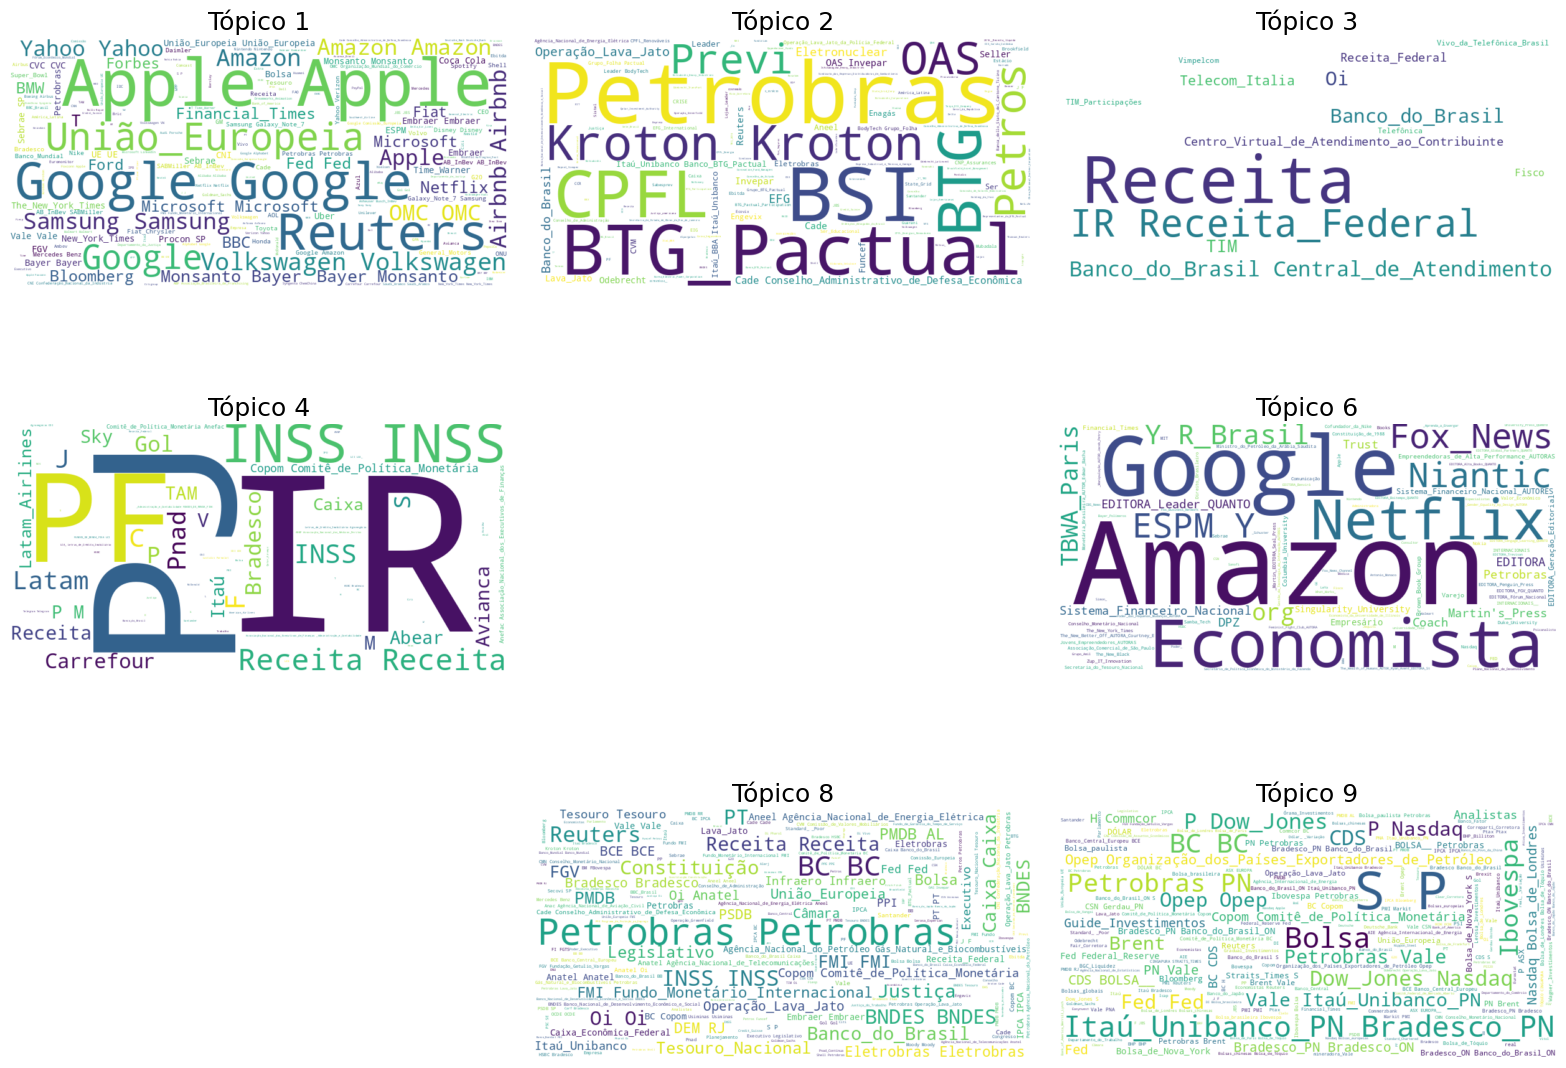

In [32]:
# Célula 31

def plot_wordcloud_entities_for_a_topic(topic:int, ax:plt.Axes) -> plt.Axes:
    topic_news = news_2016[news_2016['topic'] == topic]
    list_of_docs = topic_news.spacy_ner.apply(lambda l : [w.replace(" ", "_") for w in l])
    list_of_words = chain(*list_of_docs)
    string_complete = ' '.join(list_of_words)
    if not len(string_complete):
        return None
    return plot_wordcloud(string_complete, ax)

fig, axis = plt.subplots(3, 3, figsize=(16, 12))

axis_  = axis.flatten()
for idx, ax in enumerate(axis_):
    #ax_ = plot_wordcloud_entities_for_a_topic(idx + 1, ax)
    ax_ = plot_wordcloud_entities_for_a_topic(idx, ax)
    if ax_ is None:
        plt.delaxes(ax)
        continue
    ax.set_title(f"Tópico {idx + 1}")
fig.tight_layout()